<a href="https://colab.research.google.com/github/UnplugCharger/Week-8-Ip/blob/master/Week_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
#from matplotlib.pyplot import figure, show
import random
random.seed(30)


from sklearn.ensemble import RandomForestClassifier


# Importing Our Data and Doing Initial Look

In [ ]:
hyper=pd.read_csv('/content/drive/My Drive/Core Datasets/hypothyroid.csv')

In [ ]:
hyper.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
hyper.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
hyper.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
hyper['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
hyper.shape

(3163, 26)

In [ ]:
hyper['on_thyroxine'].unique()

array(['f', 't'], dtype=object)

We will look at the missing data  data types and dublicates etc to help us undestand  the structure and the state of our dataset

In [ ]:
#This function takes in a dataset and checks its structure and composition and returns a dataframe with the summary

def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [ ]:
#passing our dataset to the above function
sniff(hyper)

,sample,data type,percent duplicated,percent missing
status,hypothyroid,object,2.434398,0.0
FTI,10,object,2.434398,0.0
FTI_measured,y,object,2.434398,0.0
T4U,1.48,object,2.434398,0.0
T4U_measured,y,object,2.434398,0.0
TT4,15,object,2.434398,0.0
TT4_measured,y,object,2.434398,0.0
T3,0.60,object,2.434398,0.0
T3_measured,y,object,2.434398,0.0
TSH,30,object,2.434398,0.0


from the above we see we have 2.434%  duplicated values and we dont have any missing values 

Since we are doing classification  the duplicates will not affect our model that much so we will just leave them put 

We will check for Abnomalities now in all the columns . I have noticed there are question Marks lets investigate 

In [ ]:
# The following columns should be floated but they are objects lets check why they are not so 

#We will do this by trying to convert them into int data type and then see the error message to investigate 

In [ ]:
#The above error tells us that there is a '?' in the data 
# We will replace this with a Null value  try  the conversion again
# The function below is going to help us do that

def filter_b(column):
     if  column == '?':
          return ''
     else:
          return column

In [ ]:
# Passing our function onto the age column

hyper['age']=hyper['age'].apply(filter_b)

In [ ]:
hyper['age']=pd.to_numeric(hyper['age'])

In [ ]:
hyper['TSH']=hyper['TSH'].apply(filter_b)

In [ ]:
hyper['TSH']=pd.to_numeric(hyper['TSH'])

In [ ]:
hyper['T3']=hyper['T3'].apply(filter_b)

In [ ]:
hyper['T3']=pd.to_numeric(hyper['T3'])

In [ ]:
hyper['TT4']=hyper['TT4'].apply(filter_b)

In [ ]:
hyper['TT4']=pd.to_numeric(hyper['TT4'])

In [ ]:
hyper['T4U']=hyper['T4U'].apply(filter_b)

In [ ]:
hyper['T4U']=pd.to_numeric(hyper['T4U'])

In [ ]:
hyper['FTI']=hyper['FTI'].apply(filter_b)

In [ ]:
hyper['FTI']=pd.to_numeric(hyper['FTI'])

In [ ]:
sniff(hyper)

,sample,data type,percent duplicated,percent missing
age,72,float64,2.434398,14.100537
FTI,10,float64,2.434398,7.809042
T4U,1.48,float64,2.434398,7.840658
TT4,15,float64,2.434398,7.872273
T3,0.6,float64,2.434398,21.972811
TSH,30,float64,2.434398,14.796080
status,hypothyroid,object,2.434398,0.000000
FTI_measured,y,object,2.434398,0.000000
T4U_measured,y,object,2.434398,0.000000
TT4_measured,y,object,2.434398,0.000000


Having replaced the ? with null values now we can see that there are missing values in our numeric columns 

In the next section we are going to Investigate anomalies withing the catergorical variables

In [ ]:
hyper['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
hyper['FTI_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
hyper['T4U_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
hyper['sex'].unique()

array(['M', 'F', '?'], dtype=object)

In [ ]:
hyper['sex']=hyper['sex'].apply(filter_c)

In [ ]:
hyper['sex']=hyper['sex'].astype(str)

In [ ]:
hyper['sex'].unique()

array(['M', 'F', ''], dtype=object)

In [ ]:
def filter_c(column):
     if  column == '?':
          return np.nan
     else:
          return column

In [ ]:
hyper['TT4_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
hyper['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [ ]:
hyper['TBG_measured'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
hyper['TBG']=hyper['TBG'].apply(filter_c)

In [ ]:
hyper['TBG']=pd.to_numeric(hyper['TBG'])

its alot of wor going through all the columns  iwill write afunction that saves to a dataframe the unique values and only chech catergorical values that are more than three

In [ ]:
df_unique = hyper.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [ ]:
df_unique

,Variable,DistinctCount
0,status,2
1,age,92
2,sex,3
3,on_thyroxine,2
4,query_on_thyroxine,2
5,on_antithyroid_medication,2
6,thyroid_surgery,2
7,query_hypothyroid,2
8,query_hyperthyroid,2
9,pregnant,2


All the catergorical variables now have only twovalues

In [ ]:
sniff(hyper)

,sample,data type,percent duplicated,percent missing
TBG,NaN,float64,2.434398,91.779956
age,72,float64,2.434398,14.100537
FTI,10,float64,2.434398,7.809042
T4U,1.48,float64,2.434398,7.840658
TT4,15,float64,2.434398,7.872273
T3,0.6,float64,2.434398,21.972811
TSH,30,float64,2.434398,14.796080
FTI_measured,y,object,2.434398,0.000000
T4U_measured,y,object,2.434398,0.000000
TT4_measured,y,object,2.434398,0.000000


From the above we have a column that has 98% misssing values 

this column will have to go

In [ ]:
hyper.drop('TBG',axis=1,inplace=True)

In [ ]:
hyper['TBG_measured'].unique()

array(['n', 'y'], dtype=object)

# BASELINE MODEL

We will build a baseline model with our  our continuous varibles and see how it  performs

In [ ]:
base_hyper=hyper[['status','age','FTI','T4U','TT4','T3','TSH']]

In [ ]:
base_hyper.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
base_hyper['status_encoded'] = labelencoder.fit_transform(base_hyper['status'])
base_hyper.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,status,age,FTI,T4U,TT4,T3,TSH,status_encoded
0,hypothyroid,72.0,10.0,1.48,15.0,0.6,30.0,0
1,hypothyroid,15.0,17.0,1.13,19.0,1.7,145.0,0
2,hypothyroid,24.0,0.0,1.00,4.0,0.2,0.0,0
3,hypothyroid,24.0,6.0,1.04,6.0,0.4,430.0,0
4,hypothyroid,77.0,44.0,1.28,57.0,1.2,7.3,0


In [ ]:
#since we have created a colum for the status encoded value we will go ahead and drop the original status column

base_hyper.drop('status',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Creating our Independent and the target variables
X = base_hyper.drop('status_encoded',axis=1)
y=base_hyper['status_encoded']

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1609, 6) (1609,)
(403, 6) (403,)


In [ ]:
# Instantiate model 
rf = RandomForestClassifier(random_state=42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
y_pred =rf.predict(X_test)

In [ ]:
#Cheking how our model performed 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9875930521091811

Our Basemodel has performed really well  

This may be because most strong indicators of Hyperthyroidism are in the continous variables used to  make this baseline model

#Data Cleaning and EDA

We will fill out the missing avalues in this section and tae some loo into our data and see how our finalmodel will perform 

### Univariate Analysis

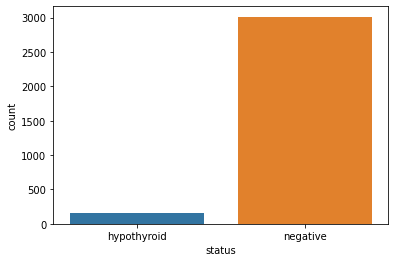

In [ ]:
sns.countplot(hyper['status'])

our sample dataset is really biased .... almost all the data points indicate a state where a patient had no hyperthyroidism.  This is not good for prediction   and will lead to model bias

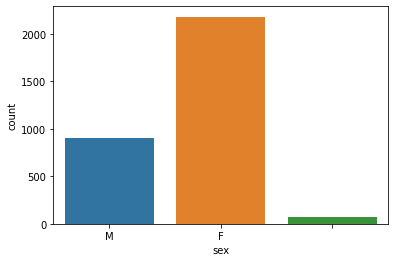

In [ ]:
sns.countplot(hyper['sex'])

Most individual in our sample are female ... almost 70% .... This maybe a problem which could result in model bias if sex will be found to be a strong indicator of whether a patient is positive or negative.

We also have a funny gender '?' which we will treat as a null value 

###Bivariate Analysis


<Figure size 2160x1440 with 0 Axes>

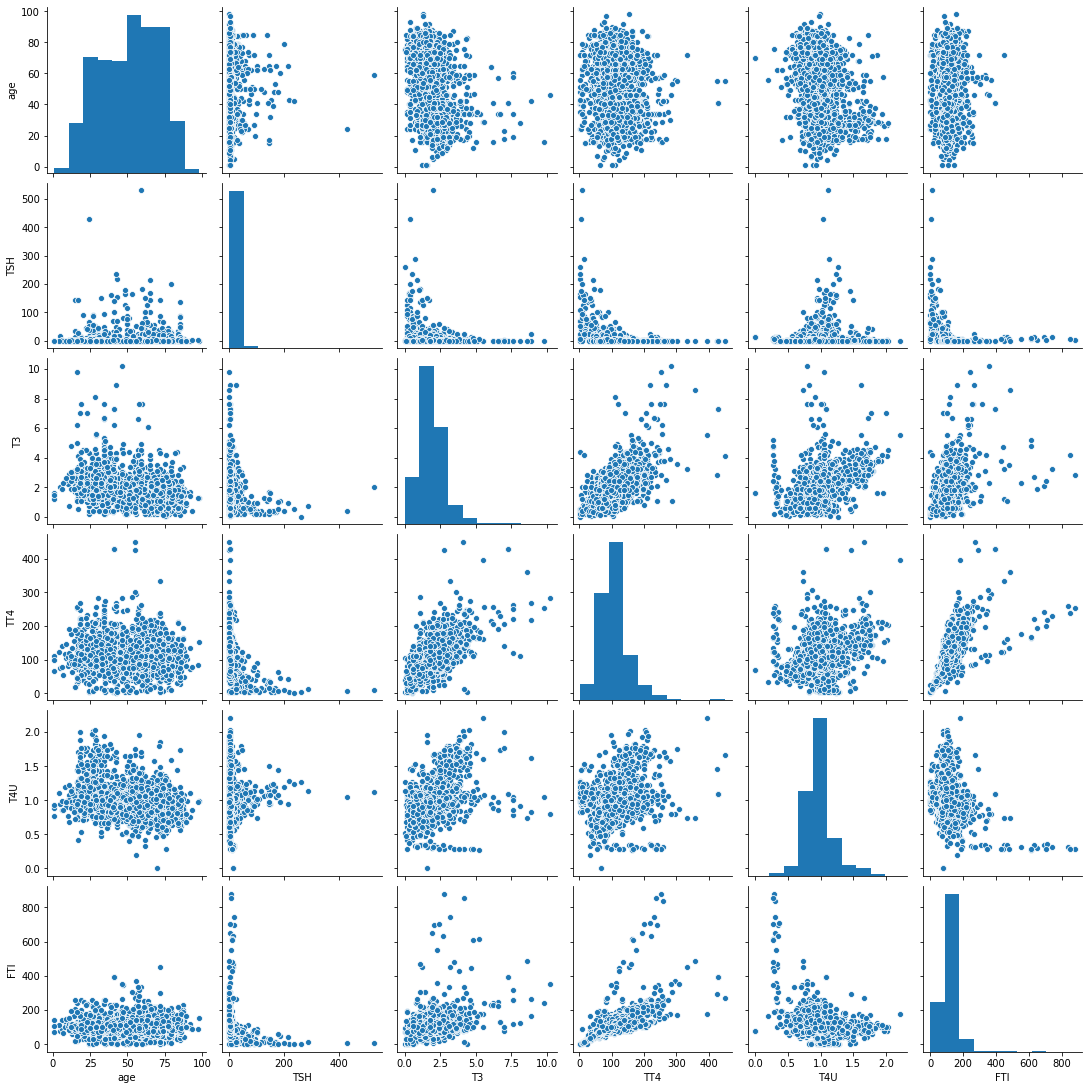

In [ ]:
plt.figure(figsize=(30, 20))
sns.pairplot(hyper)



There is no distinct relationship between our features

In [ ]:
hyper_corr= hyper.corr()

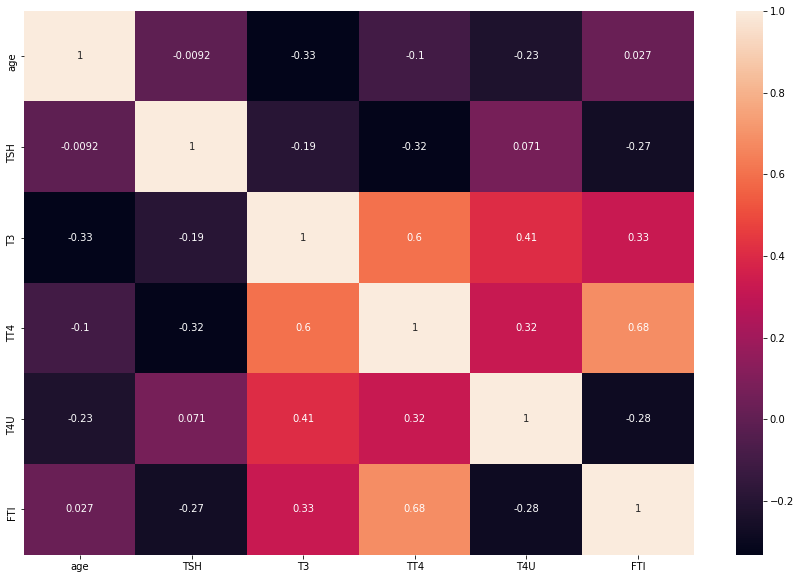

In [ ]:
plt.figure(figsize=(15, 10))


sns.heatmap(hyper_corr,annot=True)

our continous variables are pretty dependent  we only have two variables that are strongly correlated   that is TT4 and FT1... we will get VHIF scoores in the sections to come to see if this strong correlation is also indicating a strong collinearity . IF so we will drop one of the columns as it can affect our model accuracy.

In [ ]:
pip install fastai2

In [ ]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai2.tabular.all import *

In [ ]:
dep_var = 'status'

### Using TabularPandas and TabularProc

In [ ]:
# we will use tarbular pandas and  Fillmissing and categorify  libraries of fastai to  do encoding and handle missing values in our data 

procs = [Categorify, FillMissing]

In [ ]:
#Here we are splitting our data  and doing some stratified sampling so that we ensure that the test and train datasets each have very similar characteristics and are balanced
cont,cat = cont_cat_split(hyper, 1, dep_var=dep_var)

In [ ]:
hyper_tarbular = TabularPandas(hyper, procs, cat, cont, y_names=dep_var)

In [ ]:
hyper_tarbular.show()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,age_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na,age,TSH,T3,TT4,T4U,FTI,status
0,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,72.0,30.0,0.6,15.0,1.48,10.0,hypothyroid
1,F,t,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,15.0,145.0,1.7,19.0,1.13,17.0,hypothyroid
2,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,24.0,0.0,0.2,4.0,1.00,0.0,hypothyroid
3,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,24.0,430.0,0.4,6.0,1.04,6.0,hypothyroid
4,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,77.0,7.3,1.2,57.0,1.28,44.0,hypothyroid
5,F,f,f,f,f,t,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,85.0,138.0,1.1,27.0,1.19,23.0,hypothyroid
6,F,f,f,f,t,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,64.0,7.7,1.3,54.0,0.86,63.0,hypothyroid
7,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n,False,False,False,False,False,False,72.0,21.0,1.9,34.0,1.05,32.0,hypothyroid
8,F,f,f,f,f,t,f,f,f,f,f,f,y,n,y,y,y,n,False,False,True,False,False,False,20.0,92.0,1.8,39.0,1.21,32.0,hypothyroid
9,F,f,f,f,f,f,f,f,f,f,f,f,y,n,y,y,y,n,False,False,True,False,False,False,42.0,48.0,1.8,7.6,1.02,7.5,hypothyroid


In [ ]:
hyper_tarbular.items.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,age_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na
0,0,72.0,3,1,1,1,1,1,1,1,1,1,1,1,2,30.0,2,0.6,2,15.0,2,1.48,2,10.0,1,1,1,1,1,1,1
1,0,15.0,2,2,1,1,1,1,1,1,1,1,1,1,2,145.0,2,1.7,2,19.0,2,1.13,2,17.0,1,1,1,1,1,1,1
2,0,24.0,3,1,1,1,1,1,1,1,1,1,1,1,2,0.0,2,0.2,2,4.0,2,1.00,2,0.0,1,1,1,1,1,1,1
3,0,24.0,2,1,1,1,1,1,1,1,1,1,1,1,2,430.0,2,0.4,2,6.0,2,1.04,2,6.0,1,1,1,1,1,1,1
4,0,77.0,3,1,1,1,1,1,1,1,1,1,1,1,2,7.3,2,1.2,2,57.0,2,1.28,2,44.0,1,1,1,1,1,1,1


In [ ]:
hyper_tarbular.items.shape

(3163, 31)

From the above we see we have extra columns 

The fastai procs created new columns  with boolean true and false for the columns that had missing data so that our model could have a way of knowing where data was missing incase it affects our accuracy

In [ ]:
sniff(hyper_tarbular.items)

,sample,data type,percent duplicated,percent missing
status,0.00,int8,4.805564,0.0
TT4_na,1.00,int8,4.805564,0.0
T3_na,1.00,int8,4.805564,0.0
TSH_na,1.00,int8,4.805564,0.0
age_na,1.00,int8,4.805564,0.0
TBG_measured,1.00,int8,4.805564,0.0
FTI_measured,2.00,int8,4.805564,0.0
T4U_measured,2.00,int8,4.805564,0.0
TT4_measured,2.00,int8,4.805564,0.0
T3_measured,2.00,int8,4.805564,0.0


Now that we have encoded our catergorical variables we will Calculate the VIF scores in so doing we will check for multicollinearity and drop collinear features

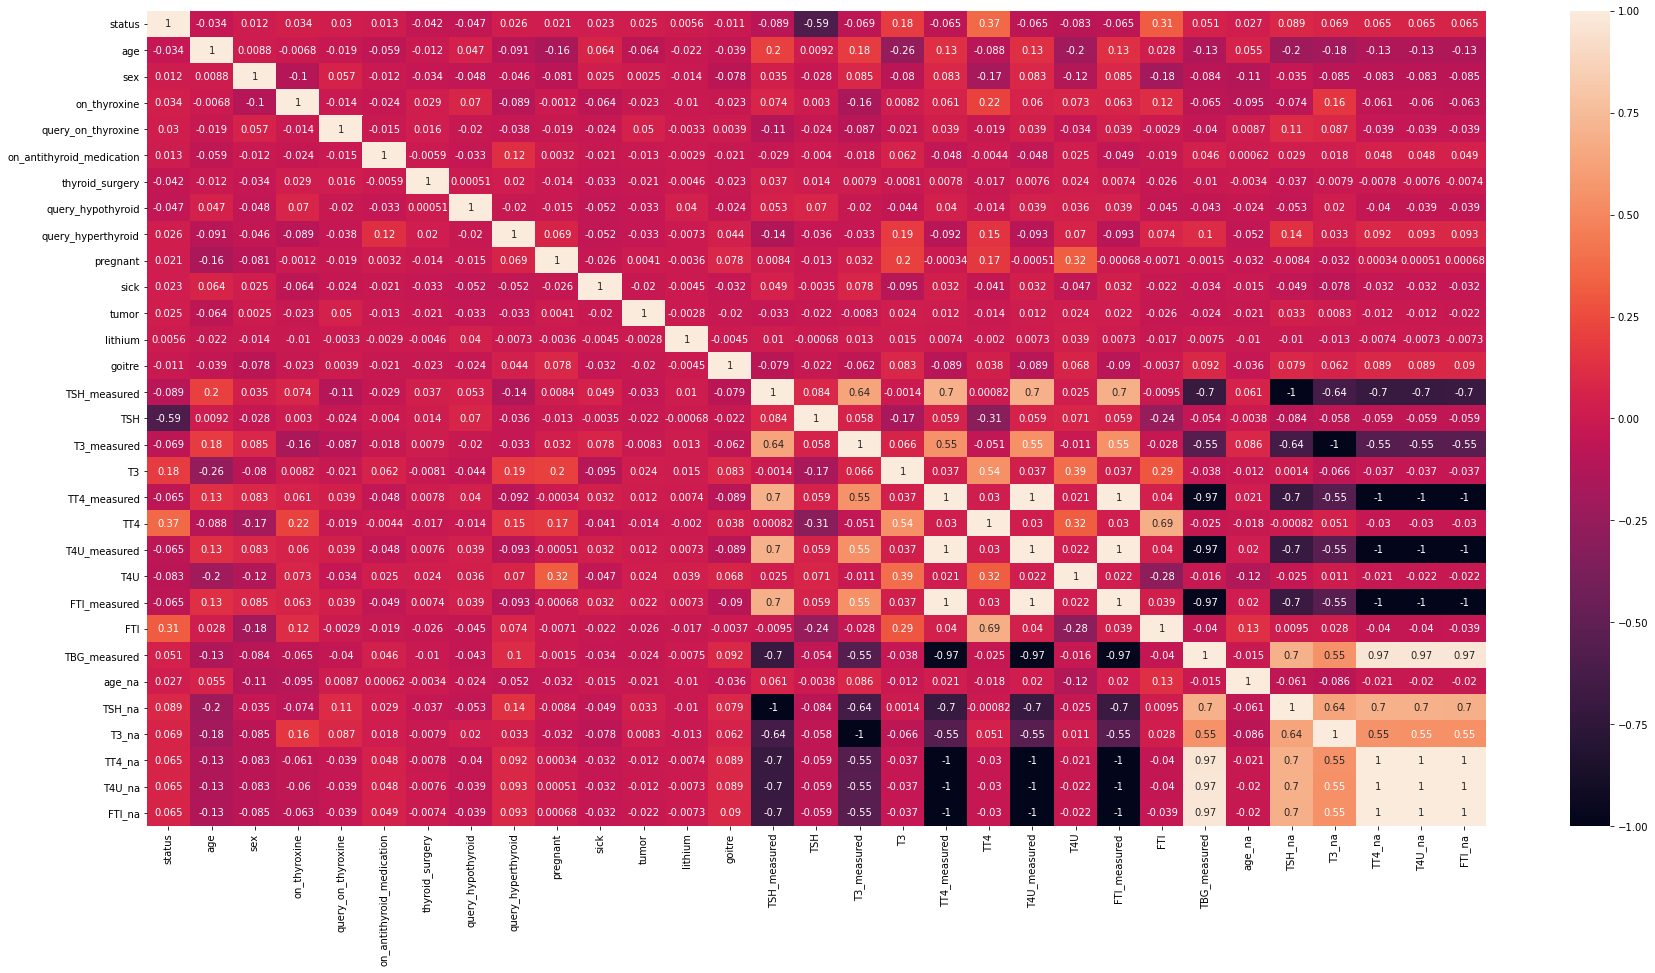

In [ ]:
plt.figure(figsize=(30, 15))
correlation_=hyper_tarbular.items.corr()

sns.heatmap(correlation_,annot=True)

In [ ]:
correlation = hyper_tarbular.items.corr()
correlation

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,age_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na
status,1.000000,-0.033879,0.011680,0.033652,0.029785,0.013020,-0.041868,-0.047477,0.025616,0.021306,0.023216,0.025340,0.005632,-0.010847,-0.089129,-0.587431,-0.068682,0.181636,-0.065451,0.374453,-0.065308,-0.082598,-0.065165,0.313482,0.050812,0.026807,0.089129,0.068682,0.065451,0.065308,0.065165
age,-0.033879,1.000000,0.008791,-0.006759,-0.019255,-0.058819,-0.012453,0.046925,-0.090627,-0.160866,0.063678,-0.064185,-0.021851,-0.039139,0.204522,0.009248,0.181310,-0.256751,0.127340,-0.088219,0.125042,-0.198175,0.125566,0.027599,-0.129488,0.055310,-0.204522,-0.181310,-0.127340,-0.125042,-0.125566
sex,0.011680,0.008791,1.000000,-0.101774,0.056627,-0.011758,-0.034185,-0.047683,-0.046360,-0.081361,0.025419,0.002541,-0.013542,-0.078257,0.035495,-0.027592,0.084820,-0.080427,0.083154,-0.174627,0.082674,-0.123162,0.084596,-0.184920,-0.083652,-0.105112,-0.035495,-0.084820,-0.083154,-0.082674,-0.084596
on_thyroxine,0.033652,-0.006759,-0.101774,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,0.073711,0.003039,-0.161656,0.008157,0.060856,0.215892,0.060482,0.073267,0.063447,0.115905,-0.064897,-0.095266,-0.073711,0.161656,-0.060856,-0.060482,-0.063447
query_on_thyroxine,0.029785,-0.019255,0.056627,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-0.108053,-0.023960,-0.087123,-0.020829,0.038886,-0.018928,0.038801,-0.033717,0.038716,-0.002876,-0.039811,0.008650,0.108053,0.087123,-0.038886,-0.038801,-0.038716
on_antithyroid_medication,0.013020,-0.058819,-0.011758,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-0.029449,-0.003956,-0.018487,0.061741,-0.048139,-0.004406,-0.048364,0.024703,-0.048590,-0.019289,0.045730,0.000617,0.029449,0.018487,0.048139,0.048364,0.048590
thyroid_surgery,-0.041868,-0.012453,-0.034185,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,0.036890,0.014235,0.007929,-0.008120,0.007816,-0.017404,0.007613,0.024171,0.007410,-0.026014,-0.009997,-0.003385,-0.036890,-0.007929,-0.007816,-0.007613,-0.007410
query_hypothyroid,-0.047477,0.046925,-0.047683,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,0.052553,0.070456,-0.020277,-0.044142,0.039701,-0.013721,0.039437,0.036144,0.039171,-0.045193,-0.042562,-0.023908,-0.052553,0.020277,-0.039701,-0.039437,-0.039171
query_hyperthyroid,0.025616,-0.090627,-0.046360,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-0.137236,-0.036332,-0.033276,0.186244,-0.092001,0.147788,-0.092509,0.069878,-0.093020,0.073953,0.103840,-0.052068,0.137236,0.033276,0.092001,0.092509,0.093020
pregnant,0.021306,-0.160866,-0.081361,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,0.008422,-0.013178,0.031931,0.202966,-0.000340,0.165318,-0.000508,0.324166,-0.000677,-0.007145,-0.001472,-0.031751,-0.008422,-0.031931,0.000340,0.000508,0.000677


In [ ]:
# Find the VIF matrix
print("Below is our VIF matrix\n")
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
VIF

Below is our VIF matrix



LinAlgError: ignored

We are unable to get the VIF matrix and the sCores since in our data we have two or more columns that have a corrrelation of one which result into singularity 

the above corrrelation table tells us that . Since high collinearity doesnt affect model accurracy but only affects compute power and time we will just go ahead and  buld our models 


# Modeling

##Decision Trees

In [ ]:
X= hyper_tarbular.items.drop('status',axis=1)

In [ ]:
y=hyper_tarbular.items['status']

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2530, 30) (2530,)
(633, 30) (633,)


In [ ]:
# Instantiate model 
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
y_pred =rf.predict(X_test)

In [ ]:
#Cheking how our model performed 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9826224328593997

our accuracy after modeling with the categorical variables included did now improve 

this adds to the thought that most strong indicators of hyperthyroidism were in the contious variables 

with that i will proceed to visualize the feature importances and see if our thought stands

In [ ]:
pip install rfpimp


In [ ]:
from rfpimp import *  # feature importance plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


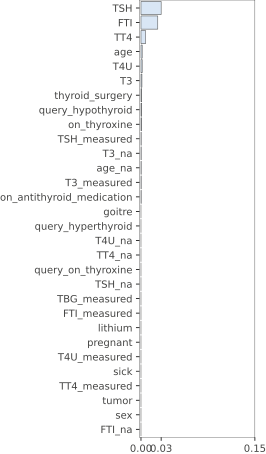

In [ ]:
I = importances(rf, X, y)
plot_importances(I)

In [ ]:
I

,Importance
Feature,
TSH,0.026557
FTI,0.022131
TT4,0.006007
age,0.001581
T4U,0.001581
T3,0.001265
thyroid_surgery,0.000948
query_hypothyroid,0.000948
on_thyroxine,0.000632


from the above we find that only a few features are actually important in our predictions 

This is particularly usefull as we can save time during data collection now that we know the features that are important 

It can also save on  data collection costs

In [ ]:
#seeing how a model bult on the three most significant features will preform

df=hyper_tarbular.items[['TSH','FTI','TT4','status']]

df.head()

,TSH,FTI,TT4,status
0,30.0,10.0,15.0,0
1,145.0,17.0,19.0,0
2,0.0,0.0,4.0,0
3,430.0,6.0,6.0,0
4,7.3,44.0,57.0,0


In [ ]:
# Creating our Independent and the target variables
X = df.drop('status',axis=1)
y=df['status']

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2530, 3) (2530,)
(633, 3) (633,)


In [ ]:
# Instantiate model 
r_f = RandomForestClassifier(random_state=42)
# Train the model on training data
r_f.fit(X_train, y_train);

In [ ]:
y_pred =r_f.predict(X_test)

In [ ]:
#Cheking how our model performed 

accuracy_score(y_test, y_pred)

0.9921011058451816

This model built on only three most important features is a masterpiece 




.




In the next step we are going to visualise our tree and see how our model fit our data 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


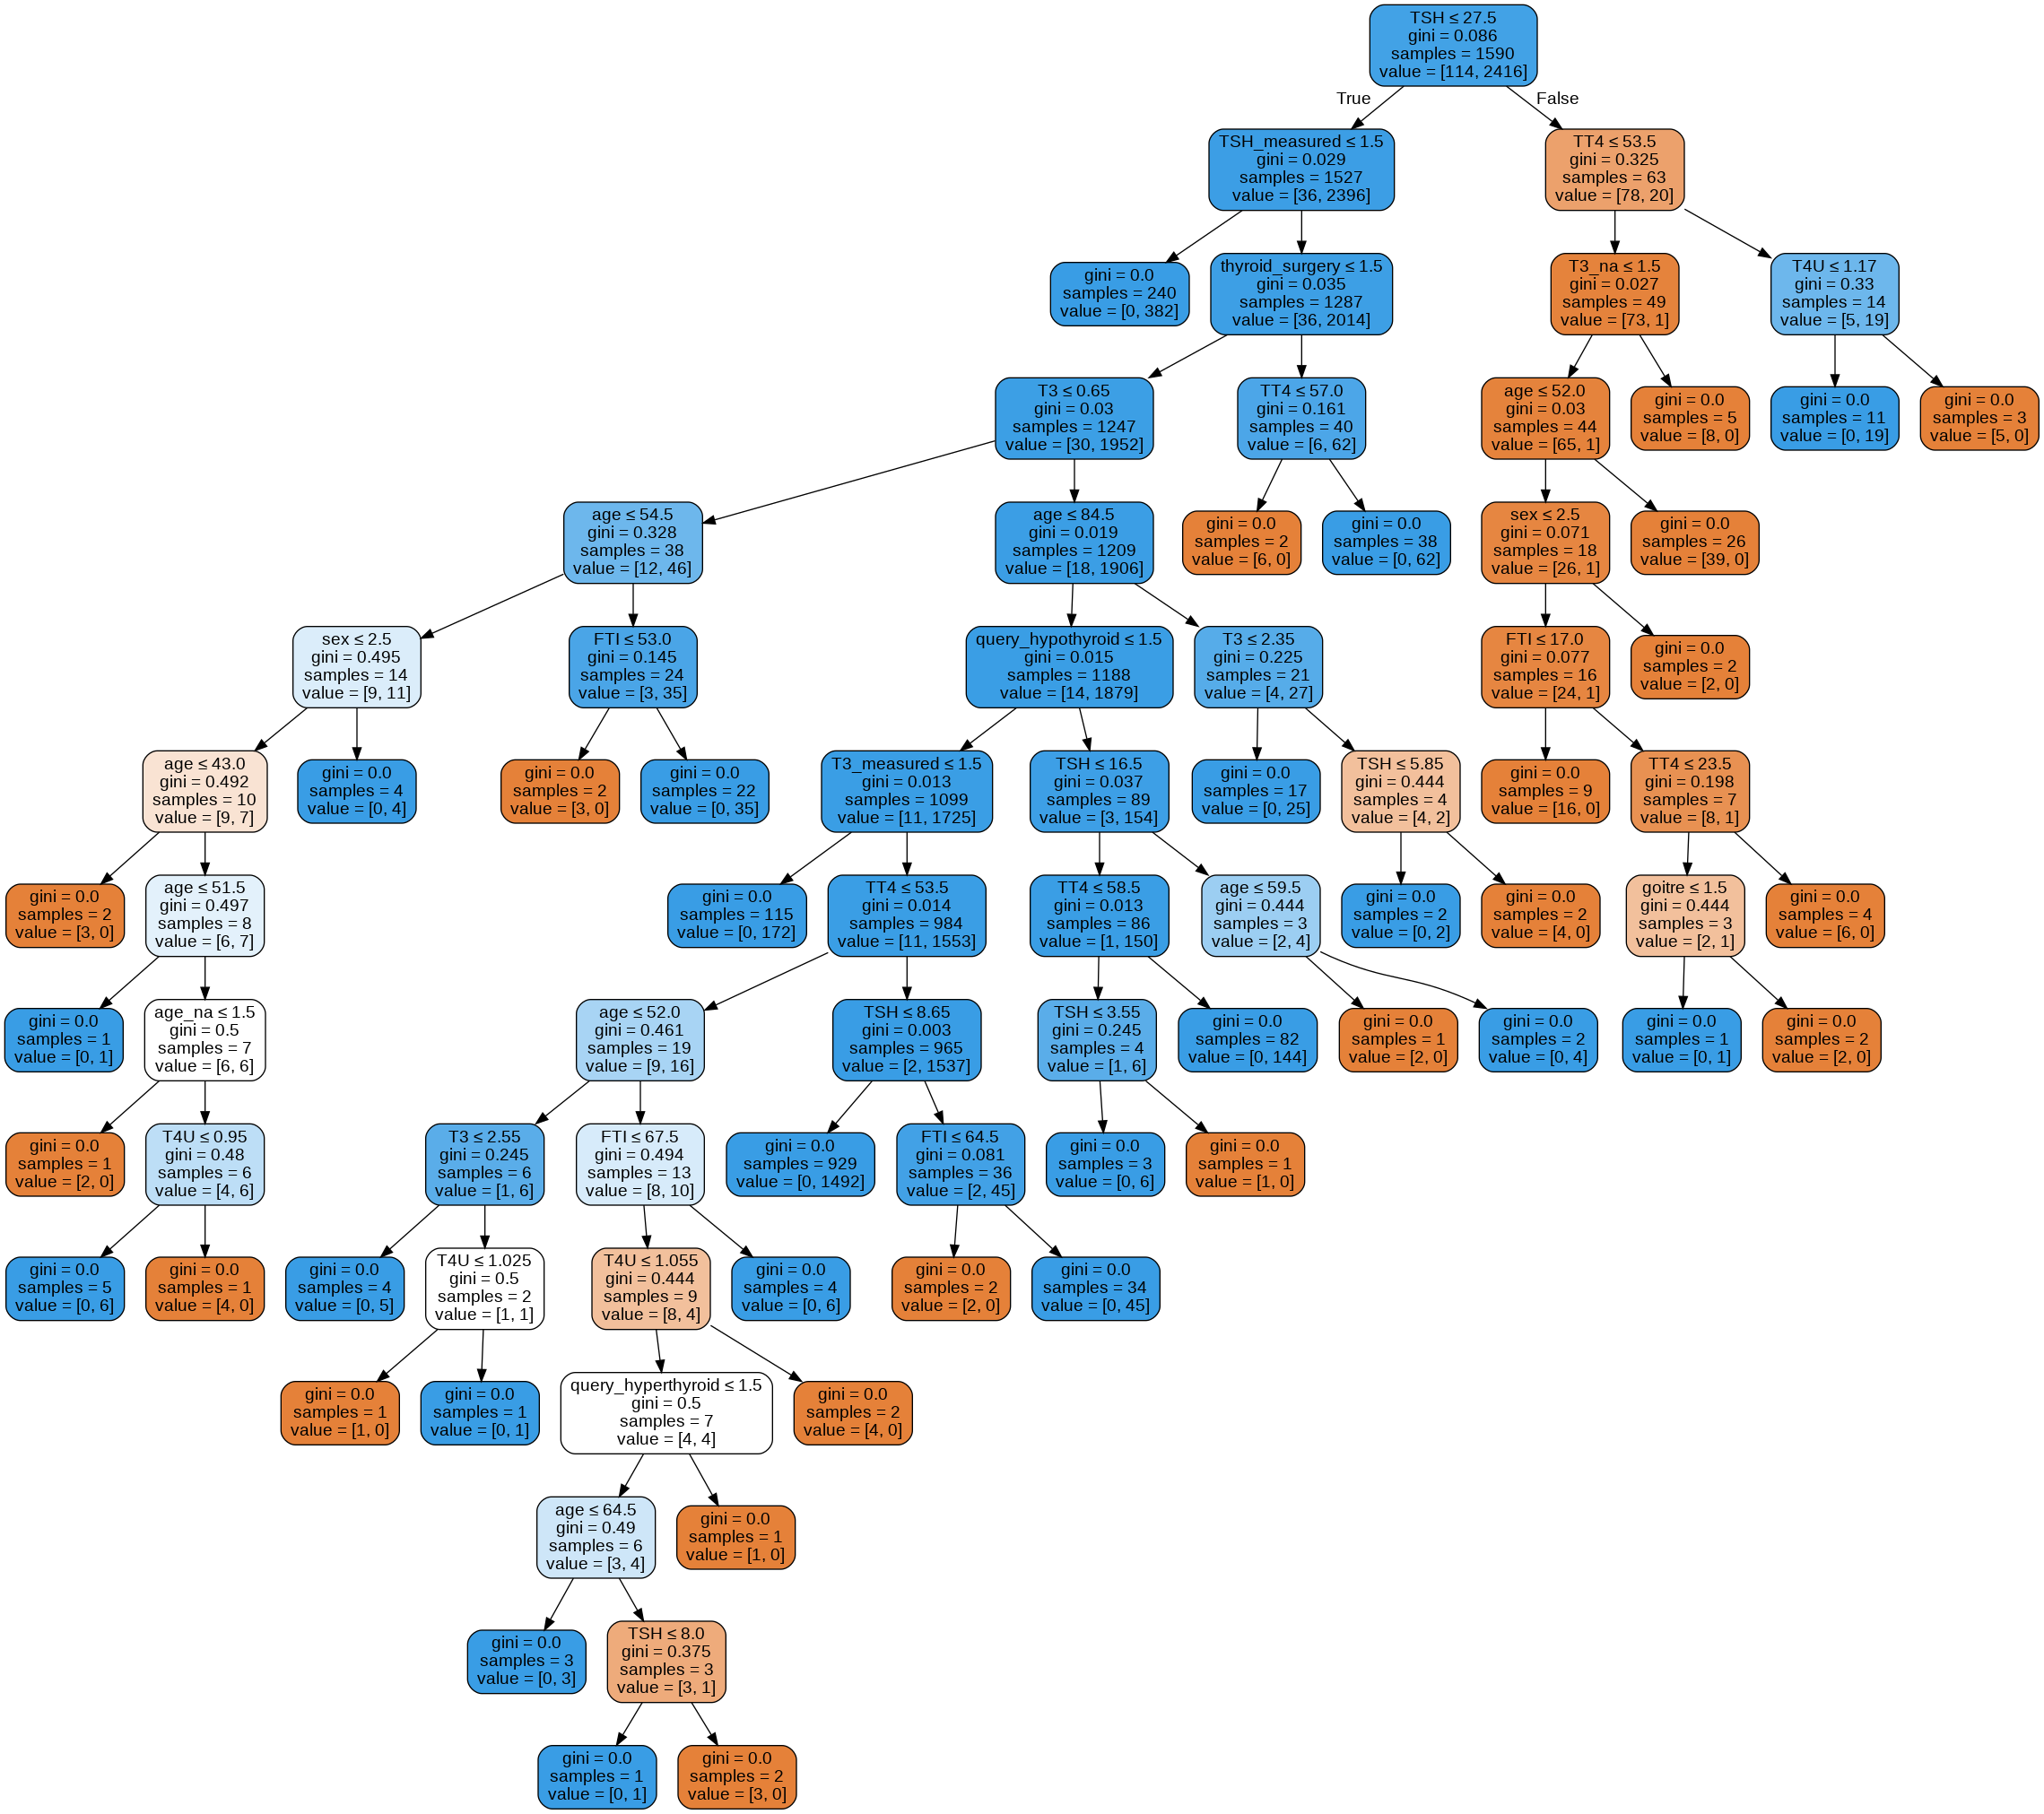

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = rf.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In this section we will do hyper parameter tunning to see if we can increase the  accuracy of our model


a. Grid Search
In this grid search I will try different combinations of RF hyperparameters.

Most important hyperparameters of Random Forest:

n_estimators = n of trees
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 100], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.10330506647252728 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.10137396037394038 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
0.10137396037394038 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.08891084489487741 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
0.10137396037394038 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.09940534656094302 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 100}
0.08434823356732998 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.08434823356732998 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 100}
0.0973969507115348 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.09940534656094302 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 100}
0.08434823356732998 {'bootst

In [ ]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

creating a model  with the best parameters

In [ ]:
# Instantiate model 
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
y_pred =rf.predict(X_test)

In [ ]:
#Cheking how our model performed 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9794628751974723

Its sad that the best features with which we should get the best predictions is  giving a lesser accuracy than our untuned model

Lets see how Gradient Boosted Algorthms will perform 

In [ ]:
import xgboost as xgb

In [ ]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.9)
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)

In [ ]:
#Cheking how our model performed 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.9826224328593997

i tried changing the estimators and the learning rates manually but there was no change  in the accuracy 


lets now see how the SVM will compare  to the Decission Trees

## Support  Vector Machines (SVM)

### Declare feature vector and target variable 

In [157]:
hyper_tarbular.items.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,age_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na
0,0,72.0,3,1,1,1,1,1,1,1,1,1,1,1,2,30.0,2,0.6,2,15.0,2,1.48,2,10.0,1,1,1,1,1,1,1
1,0,15.0,2,2,1,1,1,1,1,1,1,1,1,1,2,145.0,2,1.7,2,19.0,2,1.13,2,17.0,1,1,1,1,1,1,1
2,0,24.0,3,1,1,1,1,1,1,1,1,1,1,1,2,0.0,2,0.2,2,4.0,2,1.00,2,0.0,1,1,1,1,1,1,1
3,0,24.0,2,1,1,1,1,1,1,1,1,1,1,1,2,430.0,2,0.4,2,6.0,2,1.04,2,6.0,1,1,1,1,1,1,1
4,0,77.0,3,1,1,1,1,1,1,1,1,1,1,1,2,7.3,2,1.2,2,57.0,2,1.28,2,44.0,1,1,1,1,1,1,1


In [159]:
X=hyper_tarbular.items.drop('status',axis=1)
y=hyper_tarbular.items['status']

# splitting the data into trainning and test sets

# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###Feature Scaling

In [160]:
columns = X_train.columns

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [165]:
X_train = pd.DataFrame(X_train, columns=[columns])
X_test = pd.DataFrame(X_test, columns=[columns])

In [166]:
#takig a look into our new scaled dataframe
X_train.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,age_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na
count,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2530.0,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03,2.530000e+03
mean,1.225076e-08,8.528412e-09,1.561736e-07,-2.286651e-07,2.716075e-07,5.013976e-07,6.059413e-08,-1.038487e-07,9.199847e-09,-1.828779e-07,-8.692147e-08,0.0,-2.297841e-07,2.709302e-09,6.100641e-08,7.326895e-08,-6.525884e-09,-2.692811e-08,-2.003705e-08,9.965520e-09,-1.806280e-07,-1.716284e-07,-2.479453e-08,7.110151e-08,-7.515368e-09,-2.709302e-09,-7.326895e-08,2.692811e-08,-9.965520e-09,1.716284e-07
std,1.000196e+00,1.000193e+00,1.000196e+00,1.000181e+00,1.000192e+00,1.000188e+00,1.000195e+00,1.000202e+00,1.000203e+00,1.000194e+00,1.000209e+00,0.0,1.000197e+00,1.000197e+00,1.000197e+00,1.000193e+00,1.000197e+00,1.000200e+00,1.000196e+00,1.000196e+00,1.000197e+00,1.000189e+00,1.000198e+00,1.000198e+00,1.000194e+00,1.000197e+00,1.000193e+00,1.000200e+00,1.000196e+00,1.000189e+00
min,-2.810385e+00,-2.579883e+00,-4.099411e-01,-1.283452e-01,-1.184401e-01,-1.875852e-01,-2.792345e-01,-2.849501e-01,-1.448608e-01,-1.807016e-01,-1.113776e-01,0.0,-1.783557e-01,-2.382323e+00,-2.299959e-01,-1.892969e+00,-2.129004e+00,-3.385713e+00,-2.398417e+00,-3.394813e+00,-4.524659e+00,-3.403978e+00,-2.020456e+00,-3.024205e-01,-3.973597e-01,-4.197584e-01,-5.282705e-01,-2.953587e-01,-2.945671e-01,-2.937739e-01
25%,-7.507752e-01,-5.369709e-01,-4.099411e-01,-1.283452e-01,-1.184401e-01,-1.875852e-01,-2.792345e-01,-2.849501e-01,-1.448608e-01,-1.807016e-01,-1.113776e-01,0.0,-1.783557e-01,4.197584e-01,-2.299959e-01,5.282705e-01,-4.601713e-01,2.953587e-01,-5.308622e-01,2.945671e-01,-4.983049e-01,2.937739e-01,-3.963298e-01,-3.024205e-01,-3.973597e-01,-4.197584e-01,-5.282705e-01,-2.953587e-01,-2.945671e-01,-2.937739e-01
50%,1.398669e-01,-5.369709e-01,-4.099411e-01,-1.283452e-01,-1.184401e-01,-1.875852e-01,-2.792345e-01,-2.849501e-01,-1.448608e-01,-1.807016e-01,-1.113776e-01,0.0,-1.783557e-01,4.197584e-01,-1.983135e-01,5.282705e-01,-1.264048e-01,2.953587e-01,-1.017988e-01,2.945671e-01,-8.178569e-02,2.937739e-01,-1.315266e-01,-3.024205e-01,-3.973597e-01,-4.197584e-01,-5.282705e-01,-2.953587e-01,-2.945671e-01,-2.937739e-01
75%,6.965182e-01,1.505941e+00,-4.099411e-01,-1.283452e-01,-1.184401e-01,-1.875852e-01,-2.792345e-01,-2.849501e-01,-1.448608e-01,-1.807016e-01,-1.113776e-01,0.0,-1.783557e-01,4.197584e-01,-1.530530e-01,5.282705e-01,3.186174e-01,2.953587e-01,3.498469e-01,2.945671e-01,3.347335e-01,2.937739e-01,1.994774e-01,-3.024205e-01,-3.973597e-01,-4.197584e-01,-5.282705e-01,-2.953587e-01,-2.945671e-01,-2.937739e-01
max,2.589133e+00,1.505941e+00,2.439375e+00,7.791490e+00,8.443087e+00,5.330910e+00,3.581220e+00,3.509386e+00,6.903177e+00,5.533986e+00,8.978469e+00,0.0,5.606772e+00,4.197584e-01,2.375808e+01,5.282705e-01,8.774037e+00,2.953587e-01,7.711671e+00,2.945671e-01,5.703206e+00,2.937739e-01,1.353232e+01,3.306654e+00,2.516612e+00,2.382323e+00,1.892969e+00,3.385713e+00,3.394813e+00,3.403978e+00


 soft-margin variant of SVM.
 
Since  we did not deal with the outliers this is the variant of SVM we are going to use 

In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model.


But in every step i will have a high vlue of c and a low value of c and compare the results

####Baseline Model


This is where we just ran the SVM with   the default Parameters

In [167]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9716


####Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [168]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9700


our accurancy was supposed to increase ....since we know that our data had outliers 

but since we also know that only a few columns in our dataset had significace influence on the target 

In [169]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9700


At C=1000 the accuracy is the same 

in the next cells we will try it with different kernels

###Run SVM with linear kernel

In [170]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9731


This is higher than the base model accuracy 

since we had outliers we will increase the c valu for the linear kernel  to 100 then to 100 and see how our model performs

In [171]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9731


its constant at 100

In [172]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9731


In [173]:
#Compare the train-set and test-set accuracy

y_pred_train = linear_svc.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9870


We can see that the train set accuracy of 0.9870 and the test set accuracy of 0.9731 are close together and are comparable which means that our  model is performing well

####Check for overfitting and underfitting

In [174]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9870
Test set score: 0.9731


our trainning set and test set accuracies are close together so we can conclude that there is no issue of overfitting or underfitting

####Compare model accuracy with null accuracy
So, the model accuracy is 0.931. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [175]:
# check class distribution in test set

y_test.value_counts()

1    607
0     26
Name: status, dtype: int64

We can see that the occurences of most frequent class 1 is 607. So, we can calculate null accuracy by dividing 607 by total number of occurences.

In [176]:
# check null accuracy score

null_accuracy = (607/(607+26))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9589


We can see that our model accuracy score is 0.9731 but null accuracy score is 0.9589. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

####Run SVM with polynomial kernel

In [177]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9700


In [179]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9731


####Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [180]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 17   9]
 [  8 599]]

True Positives(TP) =  17

True Negatives(TN) =  599

False Positives(FP) =  9

False Negatives(FN) =  8


The confusion matrix shows 17 + 599 = 616 correct predictions and 9 + 8 = 17 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 17

True Negatives (Actual Negative:0 and Predict Negative:0) - 599

False Positives (Actual Negative:0 but Predict Positive:1) - 9 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 8 (Type II error)

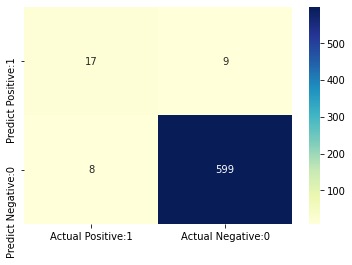

In [181]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

####Stratified k-fold Cross Validation with shuffle split 

In [182]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)



# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.97314376 0.98262243 0.98736177 0.98417722 0.98575949]


In [183]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9826


our cross validation score is higher than the highest score we obtain ... that is the linear kernel score which was 0.9731 

in the next step we will try to do some hyper parameter tuning and see what we have 

In [184]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=Tru

In [185]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9850


Parameters that give the best results : 

 {'C': 100, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [186]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9731


Building a model with the best parameters 

In [188]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100= SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with best parameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with best parameters : 0.9731


###Challenging the Solution 

The data collected for this study was biased as almost 70 percent of the data was leaning towards the situation in which a patient doesnt have hyperthyroidism 

this may have affected the accuracy of our mdel as it maybe generarised stuff and that why we found many features having zero impotrtance in the predictions